In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# df = pd.read_csv('medical_examination.csv',
#                  dtype = {'id': 'int32',
#                           'age': 'int32',
#                           'sex': 'int8',
#                           'height': 'int16',
#                           'weight': 'float32',
#                           'ap_hi': 'int16',
#                           'ap_lo': 'int16',
#                           'cholesterol': 'int8',
#                           'gluc': "int8",
#                           'smoke': 'int8',
#                           'alco': 'int8',
#                           'active': 'int8',
#                           'cardio': 'int8',
#                          }
#                 )
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df['overweight'] = df[['weight', 'height']].apply(lambda x: 1 if (x[0] / (x[1]/100)**2) > 25 else 0, axis=1)
# df['overweight'] = df[['weight', 'height']].apply(lambda x: 1 if (x[0] / (x[1]/100)**2) > 25 else 0, axis=1).astype('int8')

In [4]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [6]:
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [7]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [8]:
df['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [9]:
df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [10]:
df['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [11]:
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [12]:
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [13]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [14]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [15]:
# df_cat = df_cat.groupby(['cardio', 'variable'])['value'].sum().reset_index()

# df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().unstack(level=-1).reset_index()
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat.columns = ['cardio', 'variable', 'value', 'counts']
df_cat

,cardio,variable,value,counts
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


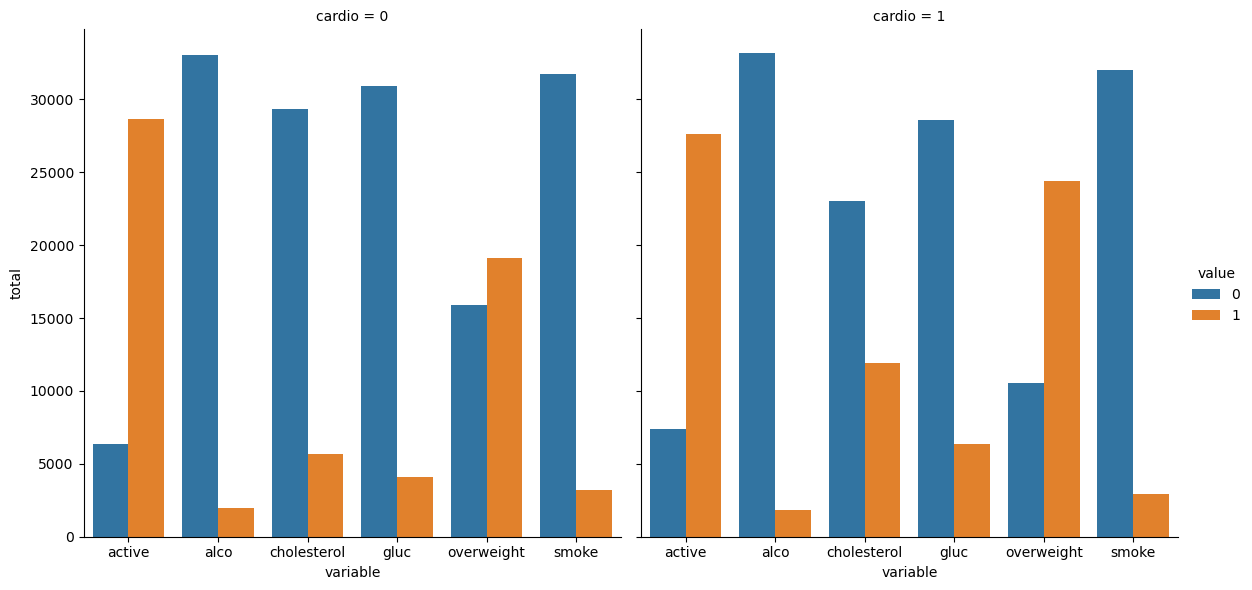

In [16]:
cat_plot = sns.catplot(data=df_cat, x='variable', y='counts', hue='value', kind='bar', height=6,
                      col='cardio')
cat_plot.set_axis_labels("variable", 'total')
cat_plot

In [17]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [18]:
df.shape

(70000, 14)

In [19]:
df_heat = df.loc[(df['ap_hi'] >= df['ap_lo']) 
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))
                ]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [20]:
df_heat.shape

(63259, 14)

In [24]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [32]:
mask = np.triu(np.ones_like(corr, dtype='bool'))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<Axes: >

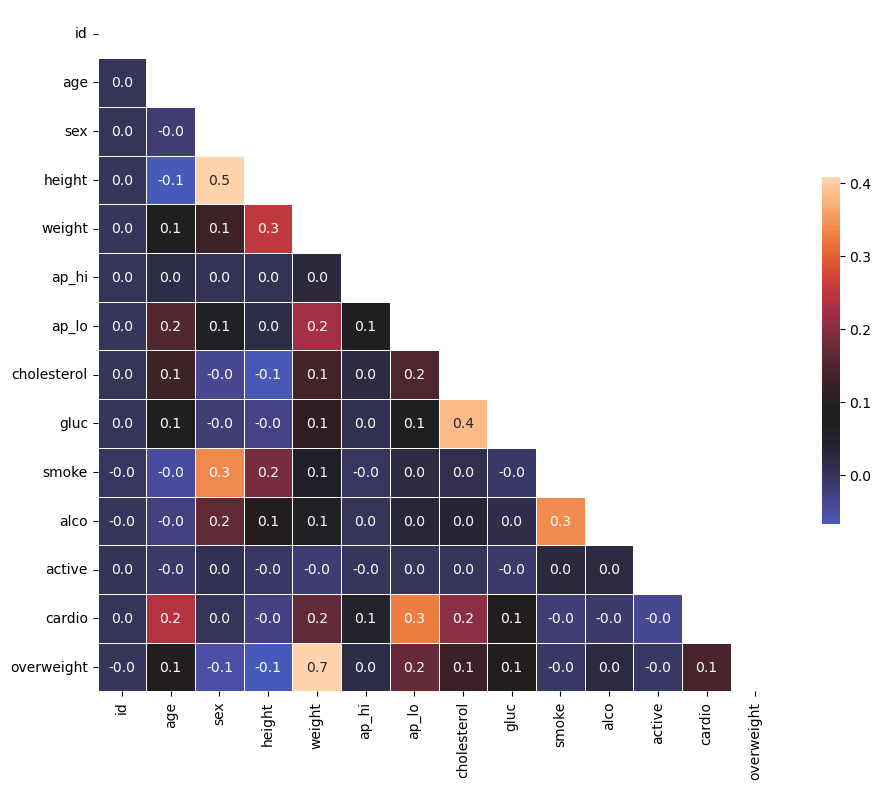

In [240]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True, fmt='.1f', linewidth=0.7, mask=mask, cbar_kws={"shrink":.5}, center=0.08, square=True, robust=True, ax=ax)
